In [2]:
from rl4greencrab.envs.simple_env import SimpleEnv
from stable_baselines3 import PPO, TD3
from sb3_contrib import TQC, RecurrentPPO
from stable_baselines3.common.env_util import make_vec_env
from rl4greencrab import evaluate_agent, multiConstAction, simulator
import pandas as pd
import numpy as np

INFO: Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO: Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO: NumExpr defaulting to 16 threads.


In [3]:
path = "../saved_agents"

In [12]:
config = {'r': 0.1, 'init_pop':20, "randomize": True}
env = SimpleEnv(config)
vec_env = make_vec_env(SimpleEnv, n_envs=12)

/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [4]:
model = PPO("MlpPolicy", env , verbose=0, tensorboard_log="/home/rstudio/logs")
model.learn(
	total_timesteps=400_000,
	progress_bar=True,
)
model.save(f"ppo_simple_env_{config}")

Output()

In [14]:
model = RecurrentPPO("MlpLstmPolicy", env , verbose=0, tensorboard_log="/home/rstudio/logs")
model.learn(
	total_timesteps=400_000,
	progress_bar=True,
)
model.save("recurrentPPO_simple_env")

Output()

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [5]:
recurrentPPOAgent = RecurrentPPO.load("recurrentPPO_simple_env")

In [22]:
ppoAgent_0 = PPO.load("../saved_agents/PPO-simpleEnv-r_1.zip")

In [36]:
ppoAgent_1 = PPO.load("../saved_agents/PPO-simpleEnv-r_0—1")

In [8]:
tqcAgent = TQC.load("../saved_agents/TQC-simpleEnv-1.zip")

In [28]:
config = {'r': 1, 'init_pop':20, "randomize": False}
env = SimpleEnv(config)
ppoData_0 = simulator(env = env, agent = ppoAgent_0).simulate_full_named_obs_acts()

/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


<Axes: xlabel='t'>

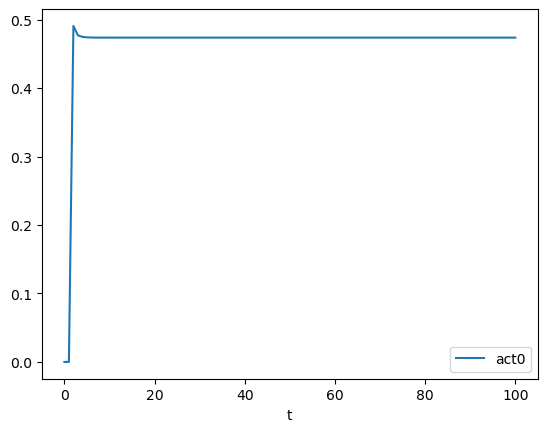

In [29]:
ppoDataDF = pd.DataFrame(ppoData_0)
ppoDataDF[(ppoDataDF.rep == 0) & (ppoDataDF.t <= 100)].plot(x='t', y ='act0')

/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


<Axes: xlabel='t'>

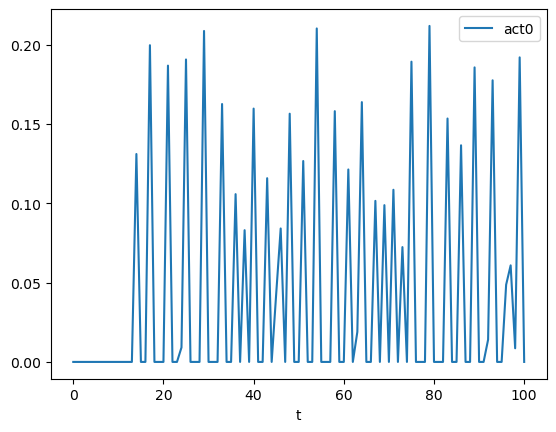

In [37]:
config = {'r': 0.1, 'init_pop':20, "randomize": False}
env = SimpleEnv(config)
ppoData_1 = simulator(env = env, agent = ppoAgent_1).simulate_full_named_obs_acts()
ppoDataDF = pd.DataFrame(ppoData_1)
ppoDataDF[(ppoDataDF.rep == 0) & (ppoDataDF.t <= 100)].plot(x='t', y ='act0')

/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


<Axes: xlabel='t'>

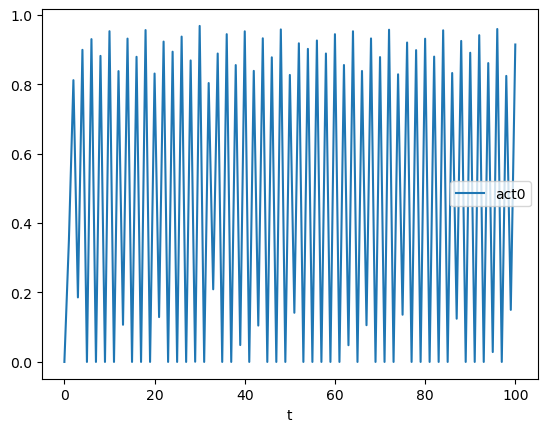

In [40]:
config = {'r': 1, 'init_pop':20, "randomize": False}
env = SimpleEnv(config)
ppoData_1 = simulator(env = env, agent = recurrentPPOAgent).simulate_full_named_obs_acts()
ppoDataDF = pd.DataFrame(ppoData_1)
ppoDataDF[(ppoDataDF.rep == 0) & (ppoDataDF.t <= 100)].plot(x='t', y ='act0')

/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


<Axes: xlabel='t'>

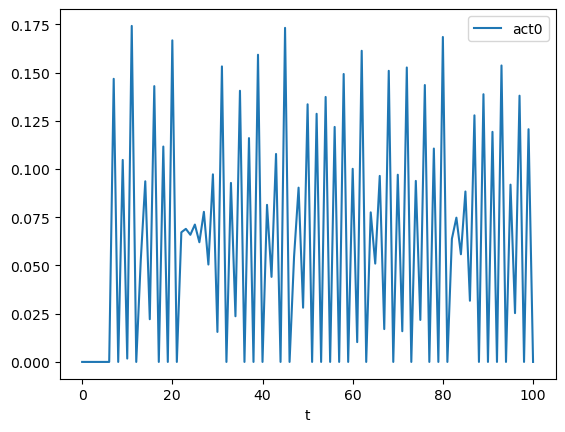

In [41]:
config = {'r': 0.1, 'init_pop':20, "randomize": False}
env = SimpleEnv(config)
ppoData_1 = simulator(env = env, agent = recurrentPPOAgent).simulate_full_named_obs_acts()
ppoDataDF = pd.DataFrame(ppoData_1)
ppoDataDF[(ppoDataDF.rep == 0) & (ppoDataDF.t <= 100)].plot(x='t', y ='act0')

### Testing ensemble PPO

In [1]:
from ensemble_ppo import *

2025-06-13 05:36:54,914	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.8.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [4]:
eppo = EnsemblePPO('MultiInputPolicy', vec_env, n_agents=3, verbose=0, tensorboard_log="/home/rstudio/logs")

[I 2025-06-13 05:28:52,541] A new study created in memory with name: no-name-98d1b0c0-17ad-4fb5-9daf-851ba77280ef
[I 2025-06-13 05:28:54,316] A new study created in memory with name: no-name-cf377122-126e-4150-9931-7479cd33938a
[I 2025-06-13 05:28:54,319] A new study created in memory with name: no-name-a8f6483f-3276-41c4-a880-41086710d0b0


In [5]:
eppo.learn(1000, progress_bar=True)

Output()

Output()

Output()

In [6]:
eppo.save('../saved_agents/eppo')

In [2]:
eppo2 = EnsemblePPO.load('../saved_agents/eppo')

Loading ../saved_agents/eppo/model_2.zip …
Loading ../saved_agents/eppo/model_0.zip …
Loading ../saved_agents/eppo/model_1.zip …


In [4]:
eppo2.predict(np.array([40]))

(array([0.01353079], dtype=float32), None)

In [9]:
ppoData = simulator(env = env, agent = eppo2).simulate_full_named_obs_acts()

In [10]:
ppoDataDF = pd.DataFrame(ppoData)
ppoDataDF.head(15000)

,t,obs0,act0,rew,rep
0,0,20.000000,0.012062,0.000000,0
1,1,32.558762,0.013177,0.241238,0
2,2,49.696152,0.013818,0.670272,0
3,3,69.008713,0.014087,1.356971,0
4,4,85.145973,0.014176,2.329064,0
...,...,...,...,...,...
14995,14995,98.223396,0.014213,20930.008598,0
14996,14996,98.223396,0.014213,20931.404632,0
14997,14997,98.223396,0.014213,20932.800666,0
14998,14998,98.223396,0.014213,20934.196700,0


<Axes: xlabel='t'>

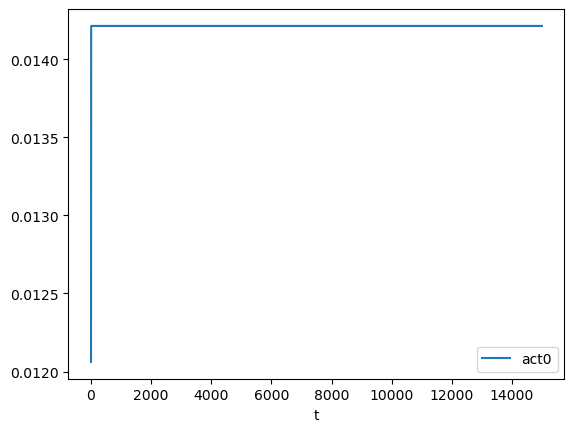

In [11]:
ppoDataDF[ppoDataDF.rep == 0].plot(x='t', y ='act0')